In [29]:
import numpy as np
import pandas as pd

In [32]:
df = pd.read_csv('IRIS.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [34]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
df = df.iloc[:,1:]

In [36]:
df.head()

,sepal_width,petal_length,petal_width,species
0,3.5,1.4,0.2,Iris-setosa
1,3.0,1.4,0.2,Iris-setosa
2,3.2,1.3,0.2,Iris-setosa
3,3.1,1.5,0.2,Iris-setosa
4,3.6,1.4,0.2,Iris-setosa


In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
encoder = LabelEncoder()

In [41]:
df['species'] = encoder.fit_transform(df['species'])

In [42]:
df.head()

,sepal_width,petal_length,petal_width,species
0,3.5,1.4,0.2,0
1,3.0,1.4,0.2,0
2,3.2,1.3,0.2,0
3,3.1,1.5,0.2,0
4,3.6,1.4,0.2,0


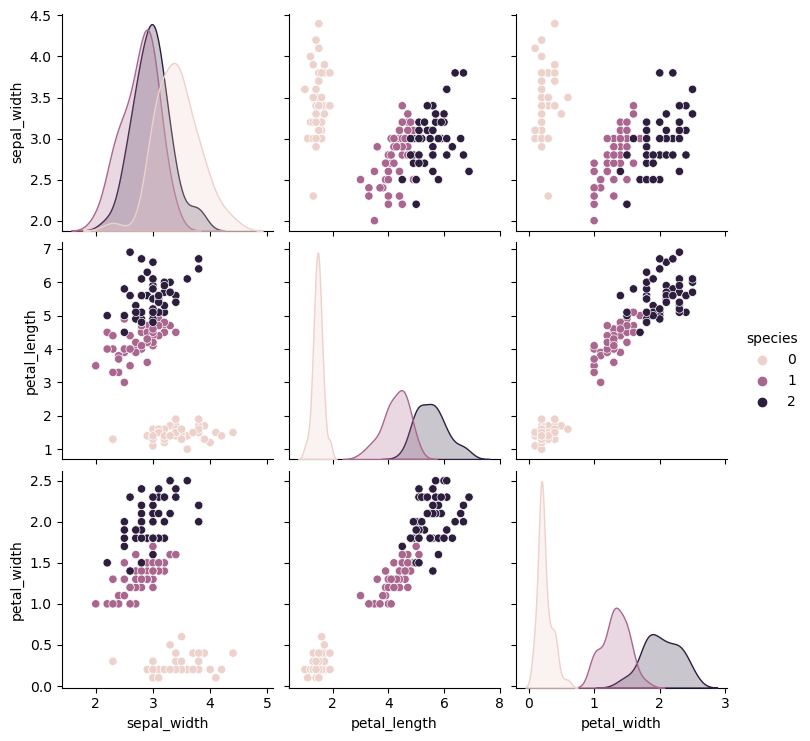

In [43]:
import seaborn as sns
sns.pairplot(df,hue='species')

In [50]:
new_df = df[df['species'] != 0][['sepal_width','species']]

In [51]:
new_df.head()

,sepal_width,species
50,3.2,1
51,3.2,1
52,3.1,1
53,2.3,1
54,2.8,1


In [52]:
new_df.shape

(100, 2)

In [53]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [55]:
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = KNeighborsClassifier()

In [56]:
estimators = [('lr',clf1),('rf',clf2),('knn',clf3)]

In [57]:
for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

lr 0.95
rf 0.95
knn 0.95


In [58]:
from sklearn.ensemble import VotingClassifier


In [59]:
vc = VotingClassifier(estimators=estimators,voting='hard')
x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.95


In [60]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc1,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.95


In [ ]:
for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
            vc = VotingClassifier(estimators=estimators,voting='soft',weights=[i,j,k])
            x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
            print("for i={},j={},k={}".format(i,j,k),np.round(np.mean(x),2))
            

for i=1,j=1,k=1 0.95
for i=1,j=1,k=2 0.95
for i=1,j=1,k=3 0.95
for i=1,j=2,k=1 0.95
for i=1,j=2,k=2 0.95
for i=1,j=2,k=3 0.95
for i=1,j=3,k=1 0.95
for i=1,j=3,k=2 0.95
for i=1,j=3,k=3 0.95
for i=2,j=1,k=1 0.95
